error= 2.1194508517653183e-07


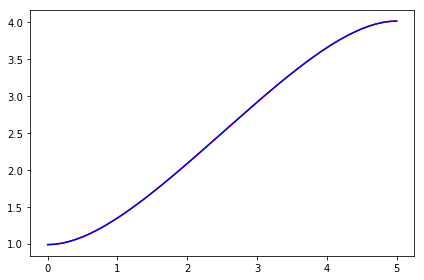

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

N = 25 # number of elements
le = 0. # left end
re = 5. # right end
dx = re/N # element size
Ndof = 2*N + 1 # number of degrees of freedom
x = np.linspace(le, re, Ndof)

def rhsf0(x):
  """ rhs function corresponding to exact solution u=1 """
  return 0*x+1.0

def exact0(x):
  """ exact solution corresponding to rhs function 1 """
  return 0*x+1.0

def rhsf1(x):
  """ rhs function = x """
  return x

def exact1(x):
  """ exact solution corresponding to rhs function x """
  a1=( np.cosh(re) - 1 )/np.sinh(re)
  return a1 * np.cosh(x) - np.sinh(x) + x

# choose which problem to solve
rhsf = rhsf1
exact = exact1

# shape functions
phi = [lambda xi: 2.0 * (xi - 0.5) * (xi - 1.0) ,\
       lambda xi: 4.0 * xi * (1.0 - xi), \
       lambda xi: 2.0 * xi * (xi - 0.5)]

# derivative of shape functions w.r.t. xi
dphi = [lambda xi: 2.0 * (xi - 0.5) + 2.0*(xi - 1.0) ,\
        lambda xi: -4.0 * xi + 4.0*(1.0 - xi), \
        lambda xi: 2.0 * xi + 2.0*(xi - 0.5)]

# Gauss points and weights
gausspts = np.array(\
          (.112701665379258311482073460022,.5,.887298334620741688517926539978))
gausswts = np.array((5.0/18.0,8.0/18.0,5.0/18.0))

# compute elemental RHS vector by integrating over one element
# int( f(x)*phi_i(x) dx ) = int ( f((xi+i)*(delta x))*(delta x) dxi )
def int_f_phi(i,f):
  # get f at Gauss points
  vf = gausswts * dx * f( (gausspts+i)*dx )
  # multply by ph
  v = np.array( [np.dot( phi[0](gausspts) , vf ), \
                 np.dot( phi[1](gausspts) , vf ), \
                 np.dot( phi[2](gausspts) , vf )  ]  )
  return v

# assenble RHS vector
rhsvec=np.zeros(Ndof)
for i in range(N):
    rhsvec[ 2*i : 2*i+3 ] += int_f_phi(i,rhsf)

# compute elemental matrix for \int \phi \phi
elemstiff1=np.zeros([3,3])
for i in range(3):
  f=np.array( [phi[0]( gausspts[i] ), phi[1]( gausspts[i] ), 
               phi[2]( gausspts[i] ) ] )
  elemstiff1 += gausswts[i] * dx * np.outer( f, f )

# compute elemental matrix for \int \phi' \phi'
elemstiff2=np.zeros([3,3])
for i in range(3):
  f=np.array( [dphi[0]( gausspts[i] ), dphi[1]( gausspts[i] ), \
               dphi[2]( gausspts[i] ) ] )
  elemstiff2 += gausswts[i] / dx * np.outer( f, f )

# Assemble the constant elemental terms of the stiffness matrix A
# int(phi_i*phi_j)
Amat1=np.zeros([Ndof, Ndof])
for i in range(N):
  Amat1[  2*i : 2*i+3 , 2*i : 2*i+3 ] += elemstiff1

# int(phi_i'*phi_j')
Amat2=np.zeros([Ndof, Ndof])
for i in range(N):
  Amat2[  2*i : 2*i+3 , 2*i : 2*i+3 ] += elemstiff2
  
Amat = Amat1 + Amat2

u = la.solve(Amat,rhsvec)

# print "u=",u
# print "exact=", exact(x)

print ("error=", la.norm( u - exact(x) )/la.norm( exact( x ) ))

# plot true solution against computed solution
xplot = np.linspace( x[0], x[-1], 1000)
uexactplot = exact( xplot )

plt.plot(xplot, uexactplot, 'r', x, u, 'b')
plt.tight_layout()
plt.show()



In [3]:
import copy as cp

x = [1, 2]
y = [3, 4, x]
z = y
print ("x=",x," y=",y," z=",z)

c=cp.copy(y)
d=cp.deepcopy(y)
print ("y=",y," z=",z," c=",c," d=",d)

y[0] = '*'
print ("y=",y," z=",z," c=",c," d=",d)

z[2][0] = 9
print ("x=",x," y=",y," z=",z," c=",c," d=",d)

c[2][1] = 'c'
print ("x=",x," y=",y," z=",z," c=",c," d=",d)


x= [1, 2]  y= [3, 4, [1, 2]]  z= [3, 4, [1, 2]]
y= [3, 4, [1, 2]]  z= [3, 4, [1, 2]]  c= [3, 4, [1, 2]]  d= [3, 4, [1, 2]]
y= ['*', 4, [1, 2]]  z= ['*', 4, [1, 2]]  c= [3, 4, [1, 2]]  d= [3, 4, [1, 2]]
x= [9, 2]  y= ['*', 4, [9, 2]]  z= ['*', 4, [9, 2]]  c= [3, 4, [9, 2]]  d= [3, 4, [1, 2]]
x= [9, 'c']  y= ['*', 4, [9, 'c']]  z= ['*', 4, [9, 'c']]  c= [3, 4, [9, 'c']]  d= [3, 4, [1, 2]]


C:\Users\Administrator\SWC-conda\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\Administrator\SWC-conda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Administrator\SWC-conda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


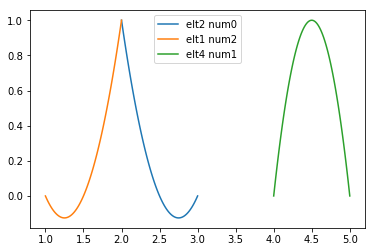

In [5]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# shape functions
phi = [lambda xi: 2.0 * (xi - 0.5) * (xi - 1.0) ,\
       lambda xi: 4.0 * xi * (1.0 - xi), \
       lambda xi: 2.0 * xi * (xi - 0.5)]

L = 5
N = 5
dx = float(L)/float(N)
Ndof = 2*N+1
Nplot = 100
x = np.linspace(0,L,Ndof)
xiplot = np.linspace(0,1,Nplot)

def plotphi(k,n,hold):
    """
    plot one of the shape functions
    use "hold on" if hold is true, not if not
    """
    assert( k>=0 and k<=N)
    xplot = (k+xiplot)*dx
    plt.hold(hold)
    plt.plot(xplot,phi[n](xiplot),label="elt%d num%d"%(k,n) )
    
plotphi(2,0,False)
plotphi(1,2,True)
plotphi(4,1,True)
plt.legend(loc='upper center')

plt.show()
